In [270]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [296]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import mplfinance as mpf
import matplotlib.pyplot as plt
import plotly.express as px
from pypfopt import plotting
import math
import pyfolio as pf

In [330]:
tickers = [ 'CL2.PA', 'VEVE.L', 'MDBUA.SW', 'BTC-USD', 'SSAC.L','WSML.L'] #'XS2D.L','WSML.L'
weight = [100, 100, 100, 100,100,100]
start_date = '2015-04-01'
end_date = '2023-02-27'
t = 1
n_sims = 5 ** 10

In [298]:
df = yf.download(tickers, start=start_date, end=end_date, adjusted=True)['Adj Close']

[*********************100%***********************]  6 of 6 completed


In [299]:
df = df.dropna()
df = df.rename(columns={"CL2.PA": "MSCI_lev", 
                    'VEVE.L': 'FTSE_develop',
                    #"LCWL.L": "MSCI_World",
                    "MDBUA.SW": "Bonds",
                    "SSAC.L": "MSCI_ACWI",
                    "WSML.L": "Small_cap",
                    "XS2D.L": "S&P_lev"})

In [300]:
df

,BTC-USD,MSCI_lev,Bonds,MSCI_ACWI,FTSE_develop,Small_cap
Date,,,,,,
2018-11-08,6453.720215,1711.599976,10.6704,3632.0,46.735001,4.98575
2018-11-09,6385.620117,1699.199951,10.6889,3620.5,46.695000,4.92450
2018-11-13,6359.490234,1673.400024,10.7031,3581.0,46.130001,4.85150
2018-11-14,5738.350098,1623.599976,10.7065,3551.0,45.674999,4.80050
2018-11-15,5648.029785,1612.800049,10.7301,3613.0,46.375000,4.77275
...,...,...,...,...,...,...
2023-02-20,24829.148438,3582.000000,10.9460,5485.5,67.010002,6.57800
2023-02-21,24436.353516,3496.500000,10.9360,5380.5,65.805000,6.48550
2023-02-22,24188.843750,3483.500000,10.8945,5376.0,65.794998,6.45350


In [301]:
print(df['MSCI_lev'].isnull().values.any())
print(df['FTSE_develop'].isnull().values.any())
print(df['Bonds'].isnull().values.any())
print(df['MSCI_ACWI'].isnull().values.any())
print(df['Small_cap'].isnull().values.any())
print(df['BTC-USD'].isnull().values.any())


False
False
False
False
False
False


In [302]:
df

,BTC-USD,MSCI_lev,Bonds,MSCI_ACWI,FTSE_develop,Small_cap
Date,,,,,,
2018-11-08,6453.720215,1711.599976,10.6704,3632.0,46.735001,4.98575
2018-11-09,6385.620117,1699.199951,10.6889,3620.5,46.695000,4.92450
2018-11-13,6359.490234,1673.400024,10.7031,3581.0,46.130001,4.85150
2018-11-14,5738.350098,1623.599976,10.7065,3551.0,45.674999,4.80050
2018-11-15,5648.029785,1612.800049,10.7301,3613.0,46.375000,4.77275
...,...,...,...,...,...,...
2023-02-20,24829.148438,3582.000000,10.9460,5485.5,67.010002,6.57800
2023-02-21,24436.353516,3496.500000,10.9360,5380.5,65.805000,6.48550
2023-02-22,24188.843750,3483.500000,10.8945,5376.0,65.794998,6.45350


In [303]:
df_norm = df.copy() # create a copy of the original DataFrame
df_norm = df_norm.apply(lambda x: x / x.dropna().iloc[0]) # normalize the DataFrame by dividing each value by the first value in its respective column

fig = px.line(df_norm, labels={'index':'Date'}, title='Normalized Price of Individual Assets')
fig.show()

In [304]:
def plot_cum_returns(data, title):    
    daily_cum_returns = 1 + data.dropna().pct_change()
    daily_cum_returns = daily_cum_returns.cumprod()*100
    fig = px.line(daily_cum_returns, title=title)
    return fig
    
fig_cum_returns = plot_cum_returns(df, 'Cumulative Returns of Individual Stocks Starting with $100')
fig_cum_returns.show()

### Daily returns

In [305]:
returns = df.pct_change().dropna() #we drop the first value since it is 0


In [306]:
fig_price = px.line(returns, title=f'{" vs. ".join(tickers)} returns: {start_date} - {end_date}')
fig_price.show()

In [307]:
returns = df.pct_change().dropna()

In [308]:
portfolio_weights = len(tickers) * [1 / len(tickers)]
portfolio_returns = pd.Series(np.dot(portfolio_weights, returns.T),
index=returns.index)

/home/alessandro/.local/lib/python3.10/site-packages/pyfolio/timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/home/alessandro/.local/lib/python3.10/site-packages/pyfolio/plotting.py:648: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Start date,2018-11-09
End date,2023-02-24
Total months,50
,Backtest
Annual return,17.6%
Cumulative returns,97.8%
Annual volatility,21.4%
Sharpe ratio,0.87
Calmar ratio,0.54
Stability,0.76
Max drawdown,-32.4%


/home/alessandro/.local/lib/python3.10/site-packages/pyfolio/plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



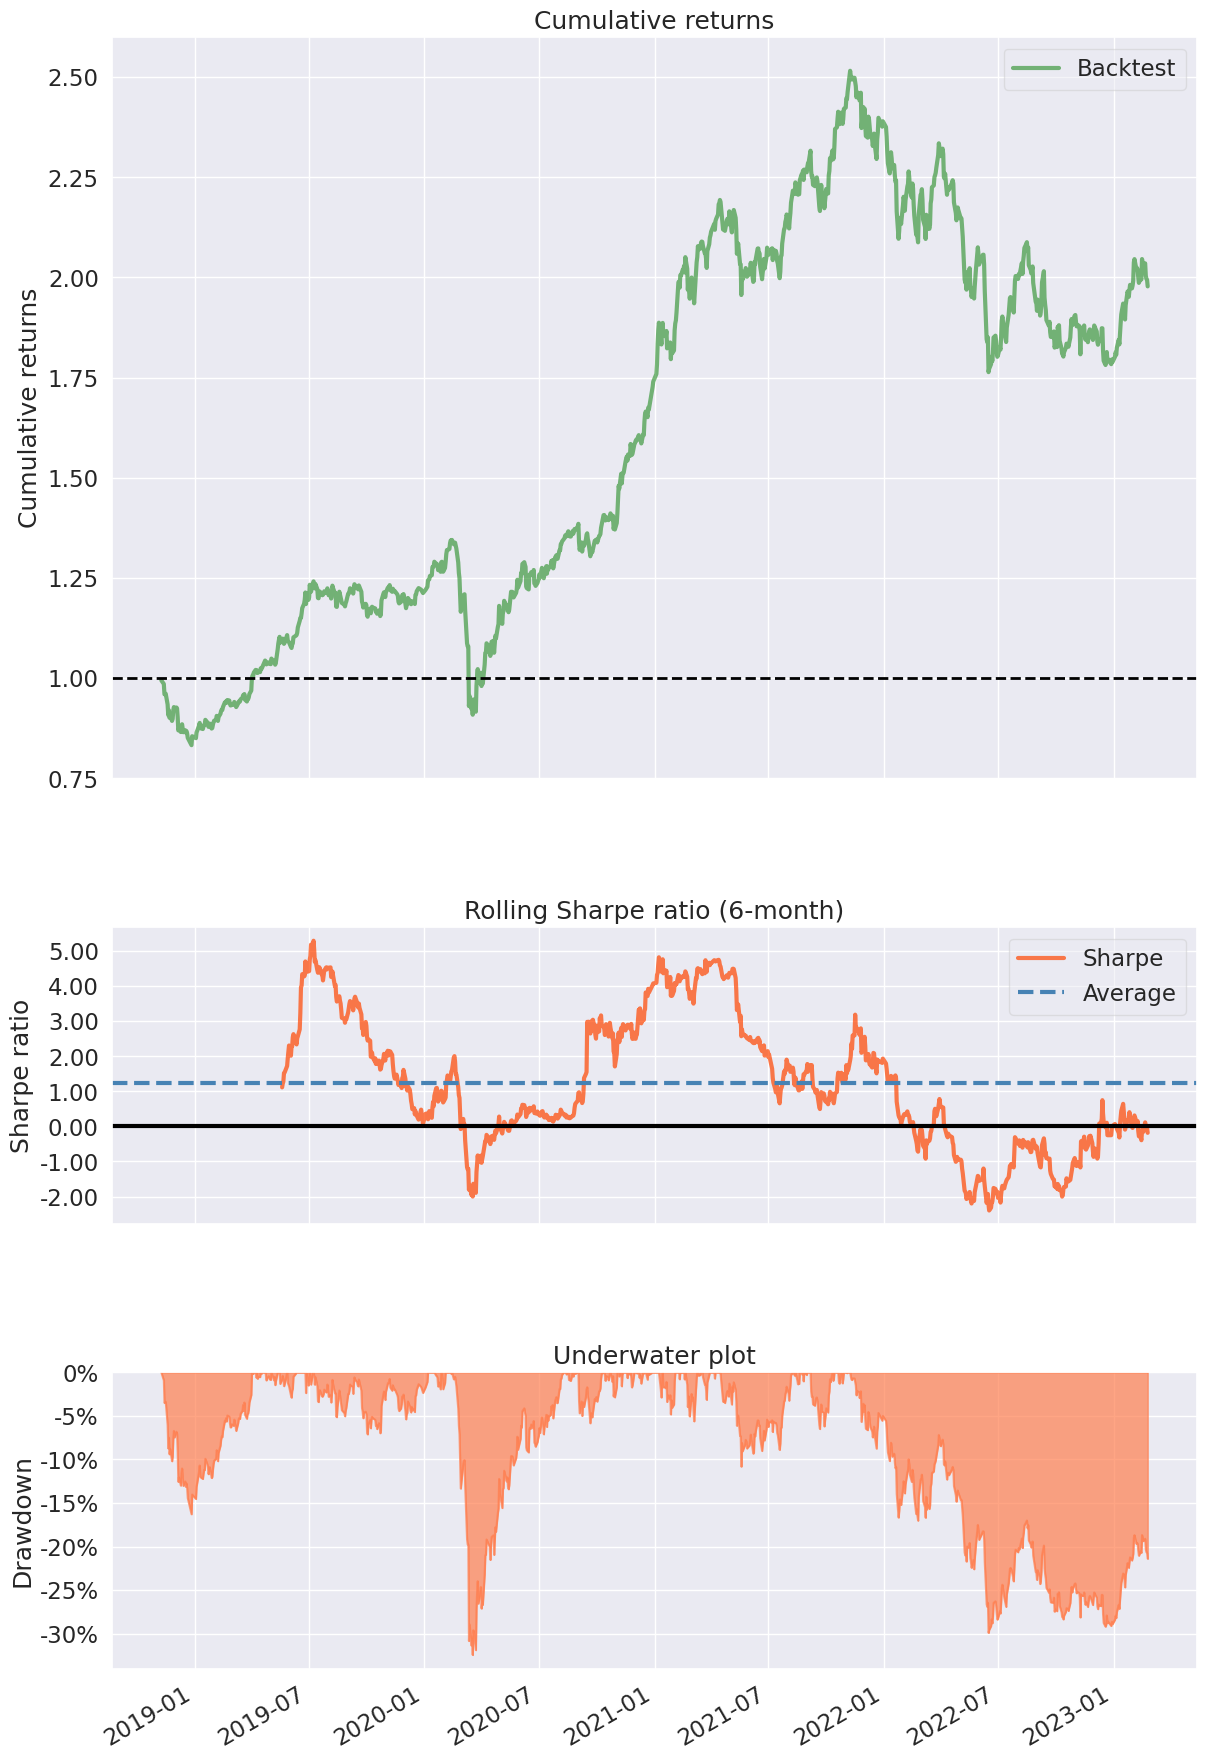

In [309]:
pf.create_simple_tear_sheet(portfolio_returns)

### Value-at-Risk

In [311]:
cov_mat = returns.cov() #historical covariance matrix
chol_mat = np.linalg.cholesky(cov_mat) # Cholesky decomposition
rv = np.random.normal(size=(n_sims, len(tickers))) #matrix of random var
correlated_rv = np.transpose(np.matmul(chol_mat, np.transpose(rv))) #add correlation to generated random var

r = np.mean(returns, axis=0).values #historical average on assets return
sigma = np.std(returns, axis=0).values # standard dev of assets return
S_0 = df.values[-1, :] # last known stock price
P_0 = np.sum(weight * S_0) # initial portfolio value

In [312]:
corr_df = df.corr().round(2) # round to 2 decimal places
fig_corr = px.imshow(corr_df, text_auto=True, title = 'Correlation between Stocks')
fig_corr.show()

In [313]:
S_T = S_0 * np.exp((r - 0.5 * sigma ** 2) * t + sigma * np.sqrt(t) * correlated_rv)
P_T = np.sum(weight * S_T, axis=1)
P_diff = P_T - P_0

In [314]:
P_diff_sorted = np.sort(P_diff)
percentiles = [0.01, 0.1, 1.]
var = np.percentile(P_diff_sorted, percentiles)

for x, y in zip(percentiles, var):
    print(f'1-day VaR with {100-x}% confidence: {-y:.2f}$')

1-day VaR with 99.99% confidence: 14258.26$
1-day VaR with 99.9% confidence: 11759.10$
1-day VaR with 99.0% confidence: 8033.50$


/tmp/ipykernel_39848/2338619949.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




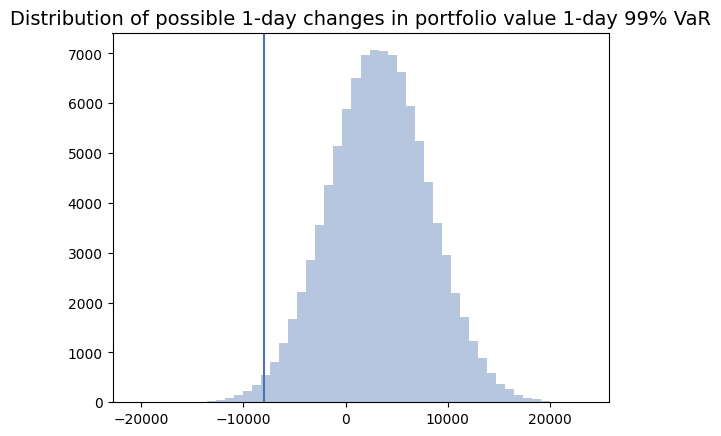

In [315]:
ax = sns.distplot(P_diff, kde=False)
ax.set_title('''Distribution of possible 1-day changes in portfolio value 1-day 99% VaR''', fontsize=14)
ax.axvline(var[2], 0, 10000);

### Efficient frontier

In [333]:
n_days = 252
n_assets = len(df.columns)

In [334]:
avg_returns = returns.mean() * n_days
cov_mat = returns.cov() * n_days

In [335]:
#generate random weights
np.random.seed(42) #set fixed seed
weights = np.random.random(size=(n_sims, n_assets))
weights /= np.sum(weights, axis=1)[:, np.newaxis]

In [336]:
portf_rtns = np.dot(weights, avg_returns)
portf_vol = []
for i in range(0, len(weights)):
    portf_vol.append(np.sqrt(np.dot(weights[i].T, np.dot(cov_mat, weights[i]))))
portf_vol = np.array(portf_vol)
portf_sharpe_ratio = portf_rtns / portf_vol

In [337]:
portf_results_df = pd.DataFrame({'returns': portf_rtns, 'volatility': portf_vol, 'sharpe_ratio': portf_sharpe_ratio})
len(portf_results_df)

9765625

In [338]:
#we are assuming 0% risk-free
N_POINTS = 100
portf_vol_ef = []
indices_to_skip = []
portf_rtns_ef = np.linspace(portf_results_df.returns.min(),
portf_results_df.returns.max(),N_POINTS)
portf_rtns_ef = np.round(portf_rtns_ef, 2)
portf_rtns = np.round(portf_rtns, 2)
for point_index in range(N_POINTS):
    if portf_rtns_ef[point_index] not in portf_rtns:
        indices_to_skip.append(point_index)
        continue
    matched_ind = np.where(portf_rtns == portf_rtns_ef[point_index])
    portf_vol_ef.append(np.min(portf_vol[matched_ind]))
portf_rtns_ef = np.delete(portf_rtns_ef, indices_to_skip)

In [339]:
MARKS = ['o', 'X', 'd', '*', 'v', '3'] #, 'v', '3', '+'
fig, ax = plt.subplots()
portf_results_df.plot(kind='scatter', x='volatility', y='returns', c='sharpe_ratio', cmap='RdYlGn', edgecolors='black', ax=ax)

ax.set(xlabel='Volatility', ylabel='Expected Returns', title='Efficient Frontier')
ax.plot(portf_vol_ef, portf_rtns_ef, 'b--')
for asset_index in range(n_assets):
    ax.scatter(x=np.sqrt(cov_mat.iloc[asset_index, asset_index]), y=avg_returns[asset_index], marker=MARKS[asset_index], s=150, color='black', label=tickers[asset_index])
ax.legend()

In [324]:
max_sharpe_ind = np.argmax(portf_results_df.sharpe_ratio)
max_sharpe_portf = portf_results_df.loc[max_sharpe_ind]
min_vol_ind = np.argmin(portf_results_df.volatility)
min_vol_portf = portf_results_df.loc[min_vol_ind]

In [325]:
print('Maximum Sharpe ratio portfolio ----')
print('Performance')
for index, value in max_sharpe_portf.items():
    print(f'{index}: {100 * value:.2f}% ', end="", flush=True)
print('\nWeights')
for x, y in zip(df.columns, weights[np.argmax(portf_results_df.sharpe_ratio)]):
    print(f'{x}: {100*y:.2f}% ', end="", flush=True)

Maximum Sharpe ratio portfolio ----
Performance
returns: 15.76% volatility: 16.79% sharpe_ratio: 93.83% 
Weights
BTC-USD: 16.00% MSCI_lev: 13.43% Bonds: 42.17% MSCI_ACWI: 27.87% FTSE_develop: 0.29% Small_cap: 0.24% 

### Evaluation of performance over time with efficient portfolio weights

In [ ]:
weights[np.argmax(portf_results_df.sharpe_ratio)]

array([0.16043997, 0.07224826, 0.38634257, 0.3809692 ])

array([0.16000853, 0.13432348, 0.4216693 , 0.27868111, 0.00294326,
       0.00237432])

/home/alessandro/.local/lib/python3.10/site-packages/pyfolio/timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

/home/alessandro/.local/lib/python3.10/site-packages/pyfolio/plotting.py:648: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Start date,2018-11-09
End date,2023-02-24
Total months,50
,Backtest
Annual return,15.3%
Cumulative returns,82.3%
Annual volatility,16.4%
Sharpe ratio,0.95
Calmar ratio,0.62
Stability,0.77
Max drawdown,-24.8%


/home/alessandro/.local/lib/python3.10/site-packages/pyfolio/plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



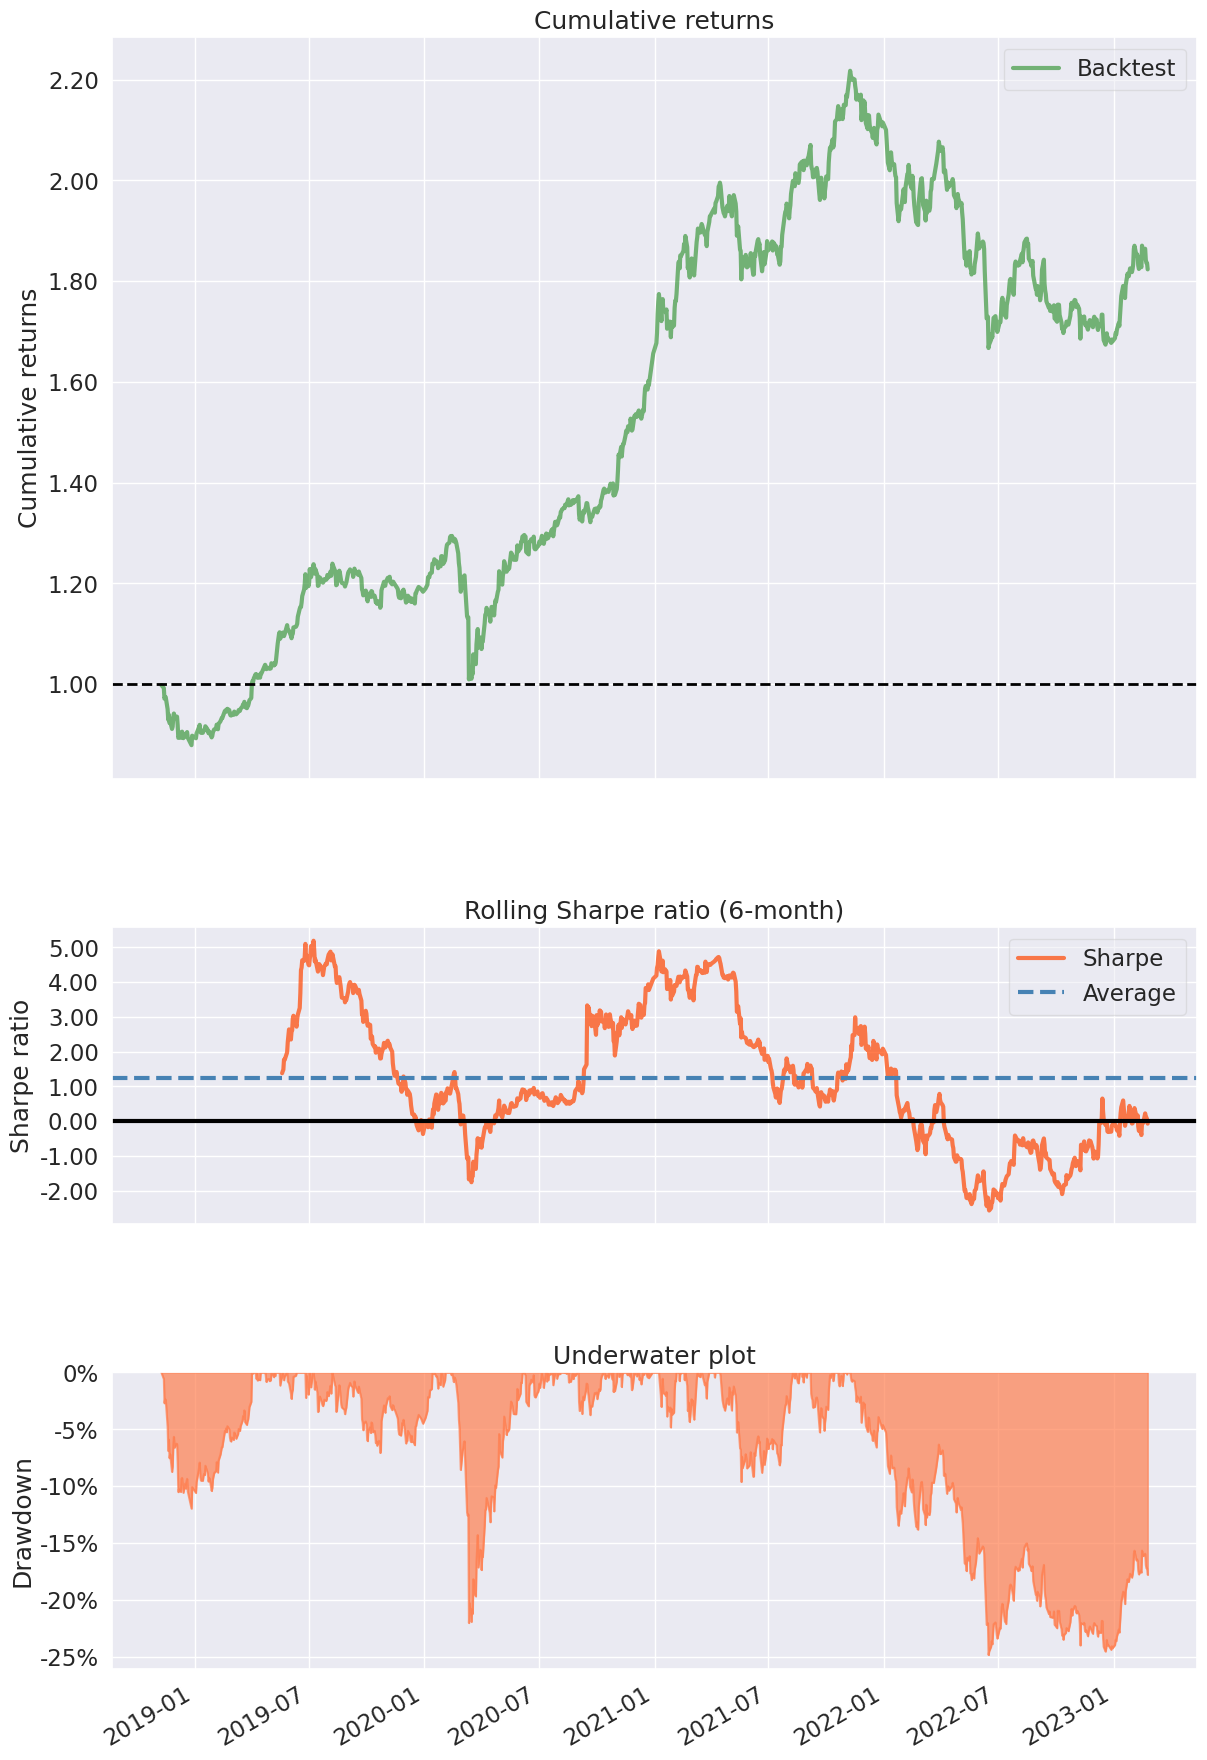

In [ ]:
prova = [0.16043997, 0.07224826, 0.38634257, 0.3809692 ]
portfolio_returns = pd.Series(np.dot(prova, returns.T),
index=returns.index)
pf.create_simple_tear_sheet(portfolio_returns)